Now that we've explored how adjusting weights and biases affects the loss function, it's time to delve into how neural networks systematically learn these optimal parameters. This is where the **backpropagation** algorithm comes into play.

# What Is Backpropagation?

Backpropagation, short for "backward propagation of errors," is a fundamental algorithm used to train neural networks. It efficiently computes the gradient of the loss function with respect to each parameter (weights and biases) in the network. These gradients indicate the direction and rate at which each parameter should be adjusted to minimize the loss.

The backpropagation process involves two main phases:​

1.Forward Pass: The input data is passed through the network layer by layer to generate an output.​

2.Backward Pass: The output is compared to the true value to compute the loss. Then, using the chain rule from calculus, the algorithm calculates how this loss changes with respect to each weight and bias in the network. These gradients are then used to update the parameters in a direction that minimizes the loss.​

This process is repeated iteratively, allowing the network to learn the optimal parameters that minimize the loss function.​​

Backpropagation is crucial because it enables neural networks to learn from data efficiently. Without it, training deep networks would be computationally infeasible. By systematically updating parameters to minimize loss, backpropagation allows neural networks to model complex, non-linear relationships in data.​

# Steps of the Backpropagation Algorithm

We can continue using the previous example where an MLP is employed to fit a simple bivariate linear equation.

In [ ]:
import random
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the target linear model: y = a * x0 + b * x1 + c
def liniear_model(input):
    a, b, c = 1, 1, 0  # Weights and bias
    output = a * input[0] + b * input[1] + c
    return output

# Generate 10 random samples with values between -10 and 10, rounded to 2 decimal places
num_samples = 10
x0_list = [round(random.uniform(-10, 10), 2) for _ in range(num_samples)]
x1_list = [round(random.uniform(-10, 10), 2) for _ in range(num_samples)]
inputs = np.array(list(zip(x0_list, x1_list)))

# Calculate the corresponding output values using the target linear model
outputs_true = [liniear_model([x0_list[i], x1_list[i]]) for i in range(num_samples)]

# Display the input-output pairs
for i in range(num_samples):
    print(f"For input: {inputs[i]} we wanted to get {outputs_true[i]}")

For input: [ 3.25 -4.81] we wanted to get -1.5599999999999996
For input: [6.17 4.84] we wanted to get 11.01
For input: [1.73 3.91] we wanted to get 5.640000000000001
For input: [-5.1  -2.97] we wanted to get -8.07
For input: [ 1.36 -9.26] we wanted to get -7.8999999999999995
For input: [-2.71  4.53] we wanted to get 1.8200000000000003
For input: [-9.95 -6.32] we wanted to get -16.27
For input: [ 2.09 -6.43] we wanted to get -4.34
For input: [ 8.72 -4.86] we wanted to get 3.8600000000000003
For input: [-1.08 -4.64] we wanted to get -5.72


The steps of the backpropagation algorithm are as follows:

1.Forward pass:

Input data is passed through the network to compute the predictions.

The loss function is used to measure how far the predictions are from the true outputs.

2.Compute gradients (Backward pass):

Starting from the output layer, we compute the gradient of the loss with respect to the output.

Then, we apply the chain rule to recursively compute gradients for each previous layer (i.e., how the loss changes with respect to the weights and biases in each layer).

3.Update parameters:

Once we have the gradients, we update the weights and biases using gradient descent:

$w \leftarrow w - \eta \frac{\partial \mathcal{L}}{\partial w}, \quad b \leftarrow b - \eta \frac{\partial \mathcal{L}}{\partial b}$

where $\eta$ is the learning rate and $\mathcal{L}$ is the loss function.

The following code provides an example of implementing backpropagation to train an MLP for fitting the linear function:

In [ ]:
import numpy as np

def toy_MLP_with_activations(input, weights, bias, activation_function=None):
    """
    A toy example of a multilayer perceptron, two inputs x1 and x2, one hidden layer with two neurons, and one output layer with one neuron.
    Also uses activation functions of your choosing
    Manually assigned weights and biases:
    """
    # These just check the inputs, weights and biases are the right shape/size
    assert input.shape == (2,), "Inputs are the wrong shape"
    assert weights.shape == (6,), "Weights are the wrong shape"
    assert bias.shape == (3,), "Biases are the wrong shape"
    # assert activation_function in [None, sigmoid, relu, tanh], "Please choose a valid activation function from [None, sigmoid, relu, tanh]"

    # If the activation function is None, we just use the identity function
    if activation_function is None:
        activation_function = lambda x: x

    # We feed the inputs into the hidden layer and calculate the outputs which then get fed into the output layer
    hidden_layer = [activation_function(input[0] * weights[0] + input[1] * weights[1] + bias[0]),
                    activation_function(input[0] * weights[2] + input[1] * weights[3] + bias[1])]
    # print(hidden_layer[0], hidden_layer[1])

    # The output of the hidden layer is then fed into the output layer
    output = hidden_layer[0] * weights[4] + hidden_layer[1] * weights[5] + bias[2]
    # print(output)
    return output,hidden_layer

def loss_function(y_true, y_pred):
    """
    Calculate the Sum of Squared Residuals (SSR)
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    residuals = y_true - y_pred
    ssr = np.sum(residuals ** 2)
    return ssr

def compute_gradients(inputs, weights, bias, outputs_true, hidden_layer, output_pred):
    """
    Compute the gradients of the loss function w.r.t. weights and biases (for backpropagation).
    """
    num_samples = len(inputs)

    # Calculate the gradient of loss with respect to output
    loss_grad = -2 * (outputs_true - output_pred)  # Derivative of SSR w.r.t output

    # Gradients w.r.t output layer weights and bias
    grad_w4 = np.sum(loss_grad * hidden_layer[0]) / num_samples  # w4 gradient
    grad_w5 = np.sum(loss_grad * hidden_layer[1]) / num_samples  # w5 gradient
    grad_b2 = np.sum(loss_grad) / num_samples  # bias2 gradient (output bias)

    # Gradients w.r.t hidden layer (no activation derivative needed)
    grad_hidden0 = loss_grad * weights[4] / num_samples
    grad_hidden1 = loss_grad * weights[5] / num_samples

    # Gradients w.r.t the hidden layer weights and biases
    grad_w0 = np.sum(grad_hidden0 * inputs[:, 0]) / num_samples  # w0 gradient
    grad_w1 = np.sum(grad_hidden0 * inputs[:, 1]) / num_samples  # w1 gradient
    grad_b0 = np.sum(grad_hidden0) / num_samples  # bias0 gradient

    grad_w2 = np.sum(grad_hidden1 * inputs[:, 0]) / num_samples  # w2 gradient
    grad_w3 = np.sum(grad_hidden1 * inputs[:, 1]) / num_samples  # w3 gradient
    grad_b1 = np.sum(grad_hidden1) / num_samples  # bias1 gradient

    gradients = {
        'grad_w0': grad_w0, 'grad_w1': grad_w1, 'grad_w2': grad_w2, 'grad_w3': grad_w3,
        'grad_w4': grad_w4, 'grad_w5': grad_w5, 'grad_b0': grad_b0, 'grad_b1': grad_b1, 'grad_b2': grad_b2
    }

    return gradients

def train_model(inputs, weights, bias, outputs_true, learning_rate=0.1):
    outputs_pred = np.array([])
    num_samples = len(inputs)

    # Forward pass and calculate loss
    for i in range(num_samples):
        output, hidden_layer = toy_MLP_with_activations(inputs[i], weights, bias)
        outputs_pred = np.append(outputs_pred, output)

    loss = loss_function(outputs_true, outputs_pred) / num_samples
    print("Loss:", loss)

    # Compute gradients via backpropagation
    gradients = compute_gradients(inputs, weights, bias, outputs_true, hidden_layer, outputs_pred)

    # Update weights and biases using the gradients
    weights[0] -= learning_rate * gradients[f'grad_w{0}']
    weights[1] -= learning_rate * gradients[f'grad_w{1}']
    return weights, bias, gradients, loss

# Define ideal model parameters (initial weights and biases)
# Initial weight values for w0, w1, and learning rate
w0_init = 5.0
w1_init = 8.0
learning_rate = 0.05
weights = np.array([w0_init, w1_init, 0, 0, 1, 0])
bias = np.array([0, 0, 0])
iterations = 10
weights_list=[]
loss_list=[]

# Training loop
for epoch in range(iterations):
    print(f'Epoch {epoch+1}/{iterations}')
    weights, bias, gradients, loss = train_model(inputs, weights, bias, outputs_true, learning_rate)
    print("Gradients: ", gradients)
    print("Updated Weights: ", weights)
    weights_list.append(weights.copy())
    loss_list.append(loss)

Epoch 1/10
Loss: 2045.1407700000004
Gradients:  {'grad_w0': np.float64(24.661132000000002), 'grad_w1': np.float64(44.340517999999996), 'grad_w2': np.float64(0.0), 'grad_w3': np.float64(0.0), 'grad_w4': np.float64(1395.9316000000001), 'grad_w5': np.float64(0.0), 'grad_b0': np.float64(-3.283), 'grad_b1': np.float64(0.0), 'grad_b2': np.float64(-32.83)}
Updated Weights:  [3.7669434 5.7829741 0.        0.        1.        0.       ]
Epoch 2/10
Loss: 960.5523219969576
Gradients:  {'grad_w0': np.float64(17.031354700569196), 'grad_w1': np.float64(30.3128695423194), 'grad_w2': np.float64(0.0), 'grad_w3': np.float64(0.0), 'grad_w4': np.float64(692.2462576305841), 'grad_w5': np.float64(0.0), 'grad_b0': np.float64(-2.2401849981800006), 'grad_b1': np.float64(0.0), 'grad_b2': np.float64(-22.401849981800005)}
Updated Weights:  [2.91537566 4.26733062 0.         0.         1.         0.        ]
Epoch 3/10
Loss: 451.19289603074765
Gradients:  {'grad_w0': np.float64(11.769337356087398), 'grad_w1': np.fl

We can visualize the process with the following code.

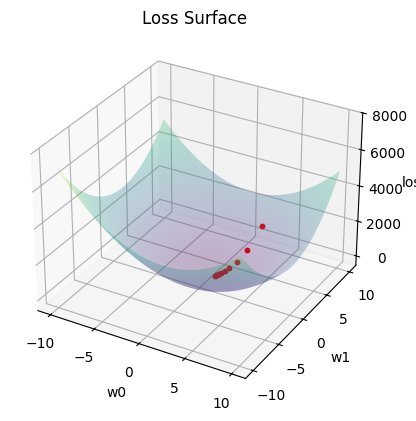

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def evaluate_model(inputs, weights, bias, outputs_true):
    outputs_pred=np.array([])
    for i in range(num_samples):
        output,_ = toy_MLP_with_activations(inputs[i], weights, bias)
        outputs_pred=np.append(outputs_pred,output)
        # print(f"For input: {inputs[i]} we wanted to get {outputs_true[i]} and got {output}")
    return loss_function(outputs_true, outputs_pred)/num_samples

# Generate a range of values for weights w0 and w1
w0_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w0
w1_values = np.linspace(-10, 10, 50)  # 50 values from -10 to 10 for w1

# Create a grid of w0 and w1 values
W0, W1 = np.meshgrid(w0_values, w1_values)

# Initialize an array to store loss values corresponding to each (w0, w1) pair
loss_values = np.zeros(W0.shape)

# Compute the loss for each (w0, w1) combination while keeping other weights fixed
for i in range(len(w0_values)):
    for j in range(len(w1_values)):
        # Only change w0 and w1
        weights = np.array([W0[i, j], W1[i, j], 0, 0, 1, 0])
        # Evaluate the model's loss with the current set of weights
        loss = evaluate_model(inputs, weights, bias, outputs_true)
        loss_values[i, j] = loss

# Plot the 3D loss surface and gradient descent step
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, loss_values, cmap='viridis', alpha=0.3)
for i in range(len(weights_list)):
    ax.scatter(weights_list[i][0], weights_list[i][1], loss_list[i], color='r', s=10, zorder=5)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('loss')
ax.set_title('Loss Surface')
plt.show()

​The goal of training a neural network is to find parameters (weights and biases) that minimize the loss function, effectively reducing the error between the model's predictions and the actual data. This optimization process is challenging due to the complex nature of the parameter space, which often contains numerous local minima and saddle points, especially in deep networks with a large number of parameters.​

To navigate this complex landscape, optimization algorithms like Stochastic Gradient Descent (SGD) are employed. SGD updates the model's parameters iteratively by computing the gradient of the loss function with respect to the parameters and moving them in the direction that decreases the loss. This process is repeated over multiple iterations, gradually converging towards a set of parameters that minimize the loss.​

Beyond SGD, several advanced optimization algorithms have been developed to enhance convergence speed and stability:​

*   Momentum: Accelerates SGD by adding a fraction of the previous update vector to the current update, helping to navigate ravines and avoid local minima.
*   AdaGrad: Adapts the learning rate for each parameter individually, performing larger updates for infrequent parameters and smaller updates for frequent ones.​
*   Adam: Combines the advantages of Momentum and AdaGrad by computing adaptive learning rates for each parameter, leading to faster convergence and better performance in practice.​

These optimization methods are crucial for effectively training deep neural networks, enabling them to learn complex patterns from data.